## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
from sklearn import model_selection , svm , metrics , tree , neighbors

## Load dataset of Iris flowers

In [2]:
data_set = pd.read_csv('IRIS.csv')
data_set.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data_set.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x = data_set.drop(columns=['species'])
y = data_set['species']
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns], 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: specie

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

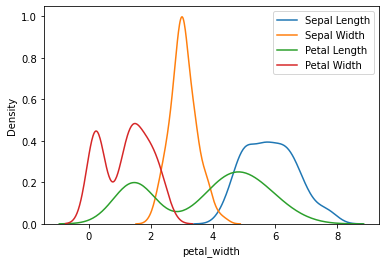

In [6]:
sn.distplot(data_set['sepal_length'],label='Sepal Length',hist=False)
sn.distplot(data_set['sepal_width'],label='Sepal Width',hist=False)
sn.distplot(data_set['petal_length'],label='Petal Length',hist=False)
sn.distplot(data_set['petal_width'],label='Petal Width',hist=False)
plt.legend()
plt.show()

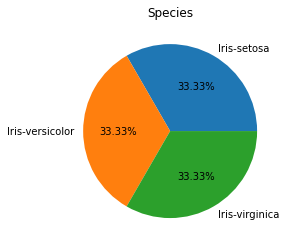

In [7]:
data_set['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

## Data Cleaning

##### check if there is null value in the attributes

In [8]:
data_set.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### remove duplicates from the dataframe

In [9]:
data_set.drop_duplicates(inplace=True)

##### check the number of duplicated rows

In [10]:
len(data_set[data_set.duplicated()])

0

## Build the model

In [11]:
tree_model = tree.DecisionTreeClassifier()

In [12]:
params={
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
}

In [13]:
scoring={
    'accuracy':metrics.make_scorer(metrics.accuracy_score),
}

## Choosing Hyperparameter

In [14]:
Kfold = model_selection.StratifiedShuffleSplit()

In [15]:
grid_search = model_selection.GridSearchCV(tree_model,param_grid=params,scoring=scoring,refit='accuracy',verbose=2,cv=Kfold)

In [16]:
grid_search.fit(x,y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=auto; total time=   0.0s
[CV] END ..................criterion=gini, max_features=sqrt; total time=   0.0s
[CV] END ..................criterion=gini, max_f

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score)}, verbose=2)

In [18]:
print('best hyperpara',grid_search.best_params_)
print('best score',grid_search.best_score_)

best hyperpara {'criterion': 'gini', 'max_features': 'sqrt'}
best score 0.9533333333333334


In [23]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(max_features='sqrt')

## Accuracy of the model

In [33]:
stratified_shuffled_k_fold=model_selection.StratifiedShuffleSplit(n_splits=5,random_state=42)
scores=[]
for train_indices,test_indices in stratified_shuffled_k_fold.split(x,y):
    x_train,x_test = x.iloc[train_indices],x.iloc[test_indices]
    y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]

    best_estimator.fit(x_train,y_train)

    y_pred = best_estimator.predict(x_test)

    acc=metrics.accuracy_score(y_test,y_pred)

print('The Accuracy of the model : ',acc)
print('\n')
print('-'*43)
print('\n')

for train_indices,test_indices in stratified_shuffled_k_fold.split(x,y):
    x_train,x_test = x.iloc[train_indices],x.iloc[test_indices]
    y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]

    best_estimator.fit(x_train,y_train)

    y_pred=best_estimator.predict(x_test)

    acc=metrics.accuracy_score(y_test,y_pred)

    acc=metrics.accuracy_score(y_test,y_pred)
    precision=metrics.precision_score(y_test,y_pred,average='weighted')
    recall=metrics.recall_score(y_test,y_pred,average='weighted')
    f1=metrics.f1_score(y_test,y_pred,average='weighted')

    scores_dict={'acc':acc,'precision':precision,'recall':recall,'f1':f1}
    scores.append(scores_dict)

scores_df=pd.DataFrame(scores)
scores_df.describe()

The Accuracy of the model :  1.0


-------------------------------------------




,acc,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.946667,0.951111,0.946667,0.946397
std,0.055777,0.054772,0.055777,0.055859
min,0.866667,0.866667,0.866667,0.866667
25%,0.933333,0.944444,0.933333,0.932660
50%,0.933333,0.944444,0.933333,0.932660
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Show the tree

[Text(0.3858695652173913, 0.9285714285714286, 'X[0] <= 5.45\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]'),
 Text(0.08695652173913043, 0.7857142857142857, 'X[2] <= 2.45\ngini = 0.25\nsamples = 49\nvalue = [42, 6, 1]'),
 Text(0.043478260869565216, 0.6428571428571429, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.13043478260869565, 0.6428571428571429, 'X[2] <= 4.2\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.08695652173913043, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.17391304347826086, 0.5, 'X[1] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.13043478260869565, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.21739130434782608, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6847826086956522, 0.7857142857142857, 'X[0] <= 6.15\ngini = 0.531\nsamples = 86\nvalue = [3, 39, 44]'),
 Text(0.45652173913043476, 0.6428571428571429, 'X[2] <= 4.75\ngini = 0.478\nsamples = 37\nvalue

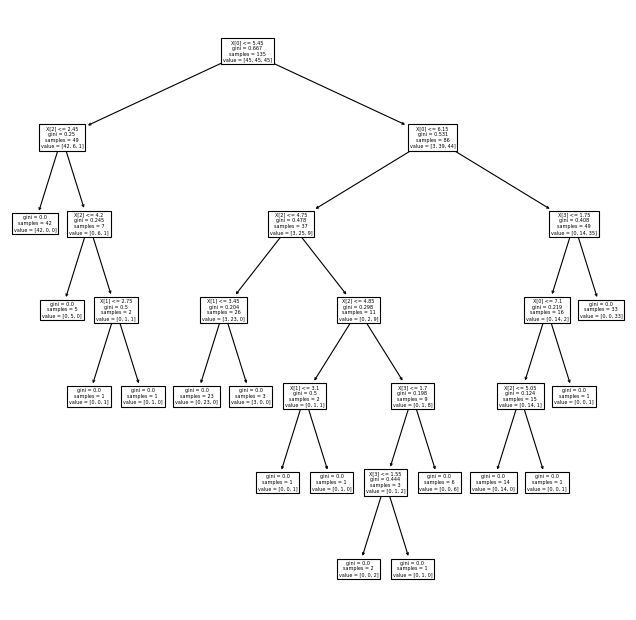

In [37]:
plt.figure(figsize=(10, 10), dpi=80)
tree.plot_tree(best_estimator)